### 1 Dowload data and some checking dataset


In [25]:

from google.colab import files
 
 
uploaded = files.upload()

Saving insurance.csv to insurance (1).csv


## 2 Importing necessary packages 


In [4]:
# Import Pandas, Matplotlib and Seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Import Logistic Regression, Ridge Classifier, Decision Tree
# Gaussian Naive Bayes, MLP Classifier and Random Forest models 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
# Import Classification Report function
from sklearn.metrics import classification_report


In [28]:
data = pd.read_csv("insurance.csv")

In [29]:
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
##Checking for NULL values
###no missing value on data

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
##Replacing  'Smoker' and 'Sex' with 0-1 dummy variables 
##( catorical variables to numeric variable)

data.smoker.replace(('yes', 'no'), (1, 0), inplace=True)
data.sex.replace(('female', 'male'), (1, 0), inplace=True)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.494768,0.500160,0.0000,0.00000,0.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#**3 Exploratory Data Analysis**

## 3.1 `bmi` Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'BMI Distribution')

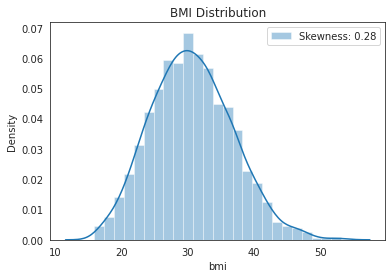

In [10]:
sns.set_style('white')
sns.distplot(data['bmi'], label = 'Skewness: %.2f'%(data['bmi'].skew()))
plt.legend(loc = 'best')
plt.title('BMI Distribution')

In [ ]:
print("Average BMI: {:.2f}".format(data['bmi'].mean()))
### bmi distribution shows  normal distribution, but the average BMI for this population is considered obese. 
###This is not surprising, as the United States has one of the highest levels of obesity in the world.

Average BMI: 30.66


##3.2 Relation bw “smoker” and “charges” 


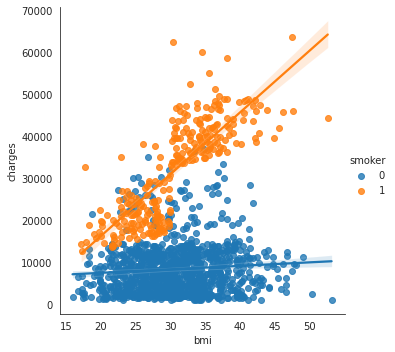

In [11]:
sns.lmplot(x = 'bmi', y = 'charges', hue = 'smoker', data = data)

## A much steeper hike for smokers compared to non-smokers. 
### We can say that smoking significantly raises health insurance cost. Also Swarmplot clearly shows that.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 51.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Charges by Smoking Habits')

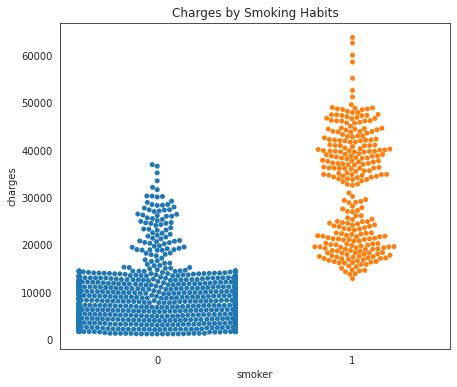

In [12]:
sns.set_style('white')
plt.figure(figsize = (7, 6))
sns.swarmplot(x = data['smoker'], y = data['charges'])
plt.title('Charges by Smoking Habits')

## 3.3 Relation bw “smoker” and “region” 


smoker       0   1
region            
northeast  257  67
northwest  267  58
southeast  273  91
southwest  267  58


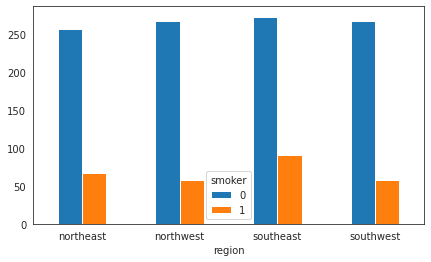

In [13]:
### Showing Numbers of Non-smokers and smokers according to regions 
CrosstabResult=pd.crosstab(index=data['region'],columns=data['smoker'])
print(CrosstabResult)

##Plot bar graph of result
CrosstabResult.plot.bar(figsize=(7,4), rot=0)

###nortwest and soutwest has same number of smoker and non=smoker individuals
#### Southeast most smoker and non=smoker individuals, so also has most population

##3.4 Relation bw “bmi” and “sex”

ValueError: ignored

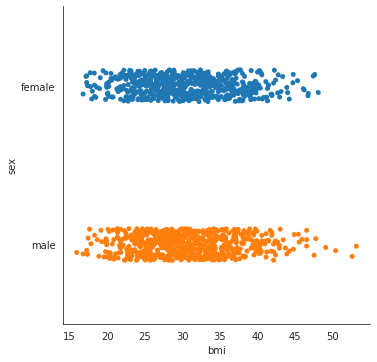

In [33]:
sns.catplot(x = data.bmi, y = data.sex, data = data);

## 3.5 Find a “region”’ has most “children”’

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64


382

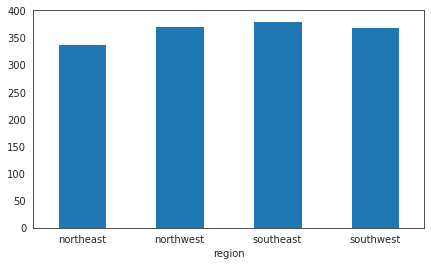

In [34]:
### calculating total number of `children` according to region
data2 = data.groupby('region')['children'].sum()
print(data2)
##graph of result
data2.plot.bar(figsize=(7,4), rot=0)

max(data2)


## We can say that children numbers close to each other among regions
### but `southeast` region has most children with number of 382


## 3.6 Relation bw “Age” and “bmi” 

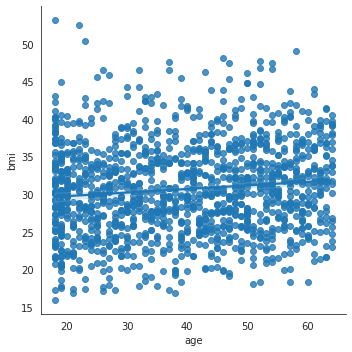

In [20]:
sns.set_style('white')
sns.lmplot(x = 'age', y = 'bmi', data = data)

## There is a positive relationship between age and bmi.
### Its also make sense when we consider individuals able to  get shorter and gain weight when getting older.

## 3.7 Relation bw “bmi” and “children” 

ValueError: ignored

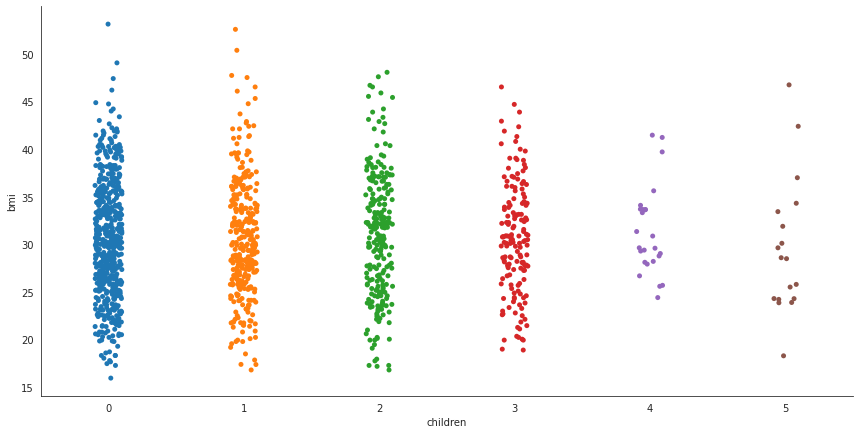

In [37]:
sns.catplot(x = data.children, y = data.bmi,
               height=6,  aspect=2,
               data= data);

## 3.8 “bmi” outliers check

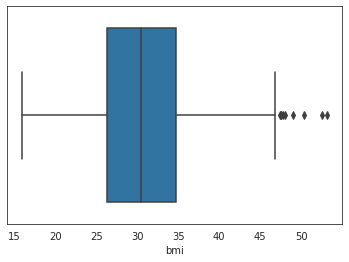

In [44]:

###its shows that we have maximum outlier for bmi variable
sns.boxplot(x = data.bmi)


## 3.9 Relation bw “bmi” and “charges” 

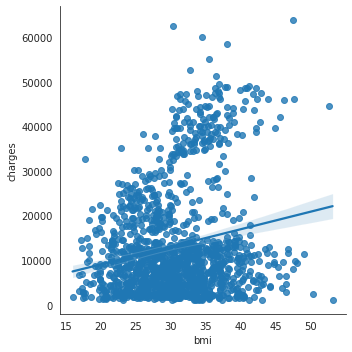

In [45]:
sns.lmplot(x = 'bmi', y = 'charges', data = data)

###The scatter diagram shows , bmi is *positively correlated* with the insurance cost ,bmi Higher customers also tend to pay more for insurance.
###model makes sense , Because of the height BMI Usually associated with a higher risk of chronic disease.

## 3.10 Relation bw “region” “smoker”  and  “bmi”  (barplot)

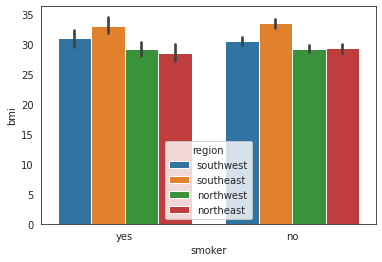

In [46]:
sns.barplot(x = data.smoker, y = data.bmi, hue = data.region, data = data);

#  4 Data Preprocessing

### 4.1- 4.2 Changing catorical variables

In [ ]:
##Replacing  'sex' and 'smoker' with 0-1 \ this time using LabelEncoder technic
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data["encoded_sex"] = encoder.fit_transform(data["sex"])
data["encoded_smoker"] = encoder.fit_transform(data["smoker"])
data.head()

,age,sex,bmi,children,smoker,region,charges,encoded_sex,encoded_smoker
0,19,1,27.900,0,1,southwest,16884.92400,1,1
1,18,0,33.770,1,0,southeast,1725.55230,0,0
2,28,0,33.000,3,0,southeast,4449.46200,0,0
3,33,0,22.705,0,0,northwest,21984.47061,0,0
4,32,0,28.880,0,0,northwest,3866.85520,0,0


In [ ]:
###One-Hot Encoding technic for `region` variable bc data have 4 regions
data_encoded = pd.get_dummies(data,columns=["region"],prefix=["region"])
data_encoded.head()

,age,sex,bmi,children,smoker,charges,encoded_sex,encoded_smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,1,1,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,0,0,1,0,0


In [ ]:
dataset = data_encoded.drop(["sex","smoker"], axis=1)
dataset.head()

,age,bmi,children,charges,encoded_sex,encoded_smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


## 4.3 Split Dataset

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

y = dataset["charges"]
x = dataset.drop(["charges"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 5 Choosing model

## 5.1 Linear Regression

In [ ]:
linearReg = LinearRegression()
model = linearReg.fit(X_train,y_train)
model.score(X_test,y_test)

0.7835929767120724

In [ ]:
from sklearn.metrics import mean_squared_error

# RMSE
print(np.sqrt(mean_squared_error(y_train,model.predict(X_train))))
print(np.sqrt(mean_squared_error(y_test,model.predict(X_test))))

6105.545160099847
5796.284659276273


In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")

array([-36893475.66639378, -43307871.90469332, -27392943.33594104,
       -36545076.53517254, -34064321.21101737, -37545462.852619  ,
       -53014180.37182803, -39961704.41522814, -38357145.09175089,
       -31776479.23374396])

In [ ]:
#cv mse
print(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
#cv rmse
print(np.sqrt(np.mean(-cross_val_score(model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error"))))

37885866.0618388
6155.149556415246


## 5.2 Ridge

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV

In [ ]:
lambdalar = 10**np.linspace(10,-2,100)*0.5

ridge_model = Ridge() #ridge model isminde ridge nesnesi oluşturduk
katsayilar = [] # daha sonrakatsayılar isminde boş bir liste oluşturduk.

for i in lambdalar:
    ridge_model.set_params(alpha = i) #paramaetreleri set etme işlemi. i ye göre alphayı değiştirecek.
    ridge_model.fit(X_train, y_train) #artık i ye göre parametre ayarlandı. şimdi fit ediyoruz.
    katsayilar.append(ridge_model.coef_) #çıkan her bir alpha değerine karşılık gelecek şekilde oluşturulan modellerin katsayılarını listeye ekliyoruz.

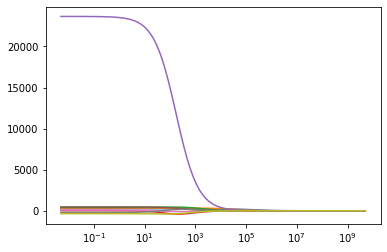

In [ ]:
ax = plt.gca() # nesne özelliği tanımladık.
ax.plot(lambdalar, katsayilar) # neyi görselleştiricez? lambdaları görselleştiricez ve bunlara karşılık katsayıları görselleştiricez.
# Yani her bir lambda değerine karşılık gelecek şekilde katsayıların nasıl oluştuğu bilgisine erişmeye çalışıcaz.
ax.set_xscale("log") # katsayılar birbirinden farklı olabilecek olduğundan dolayı, hepsini görebilmek adına bir ölçek değiştirme işlemi.
# Logaritmik dönüşüm yaptık.

In [ ]:
ridge_model

Ridge(alpha=0.005)

In [ ]:
ridge_model = Ridge().fit(X_train, y_train)

In [ ]:
# train hatası
RMSE = np.sqrt(mean_squared_error(y_train, ridge_model.predict(X_train))) #rmse'yi hesapla dedik. Neyin üzerinden hesaplayacak? ygerçek ve ytahmin.
RMSE #train setine ilişkin rmse. TRAİN SETİ ÜZERİNDEN VALİDE EDİLMEMİŞ HATA.

6105.545166297391

In [ ]:
np.sqrt(np.mean(-cross_val_score(ridge_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))
# CV YÖNTEMİ İLE 10 KATLI HATA HESAPLAMA İŞLEMİ. DAHA DÜŞÜK OLMASI OLMAMASI DEĞİL, bu kısımdaki hata daha doğru bir hata. 
# Daha doğru bir hata elimizde olursa, model optimizasyonu için daha doğru bir hata bulundurmuş oluruz ve buna göre hareket ederiz.

6155.147500881616

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_test, ridge_model.predict(X_test))) # buradaki y_pred artık, test bağımsız değişkenleri kullanılarak hesaplanmış olan testin
# bağımlı değişkenleri, tahmin edilen değerleri. y_test, test setinin y değerlerini yani gerçek bağımlı değişken değererine erişmiş oluruz.
RMSE

5796.303361591158

## 5.3 Model Tuning

In [ ]:
ridge_model = Ridge(1).fit(X_train, y_train) #ridge ile train üzerinden modelimizi fit ettik. buradaki 1, alpha değerimiz.

y_pred = ridge_model.predict(X_test) #bu modeli kullanarak, test yapmak aracılığıyla predict fonksiyonunu kullanarak, test setimizin bağımsız
#değişken değerlerini aldık. ve tahmin ettik. neyi tahmin ettik? test setinin bağımlı değişkenlerini

np.sqrt(mean_squared_error(y_test, y_pred)) #tahmin edilen bu bağımlı değişken değerleri ile test setinin gerçek değerlerini karşılaştırarak
#Hatamızı hesapladık.

5800.254118146115

In [ ]:
lambdalar1 = np.random.randint(0,1000,100)
ridgecv = RidgeCV(alphas = lambdalar1, scoring = "neg_mean_squared_error", cv = 10, normalize = True)
ridgecv.fit(X_train, y_train) 


Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

RidgeCV(alphas=array([933, 710, 879, 335, 438, 850, 332, 797, 420, 771, 305,  68, 270,
        38, 975,  61, 730, 685, 499, 723, 300, 242, 544, 246, 620, 649,
       591, 277, 448, 185, 387, 109, 757, 276, 826, 378, 677, 310, 823,
       272, 216, 307, 758, 329, 775, 665, 145,  58, 687, 378, 862, 533,
       191, 275, 213,  11, 737, 628, 845, 753, 309, 925, 668, 219, 988,
       358,  73, 104,  81, 231, 677, 148, 701, 382, 759, 366,  12, 386,
       709, 695, 506, 360, 486, 765, 687, 255, 590, 605, 656,  26, 962,
       332,  97, 490, 614, 614,  72, 773,  68, 998]),
        cv=10, normalize=True, scoring='neg_mean_squared_error')

In [ ]:
ridgecv.alpha_

11

In [ ]:
#Final

ridge_tuned = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train) #tune edilmiş final modelimiz.

In [ ]:
y_pred = ridge_tuned.predict(X_test) #tuned reidge ile xtest kullanarak y tahmin et.
np.sqrt(mean_squared_error(y_test, y_pred)) #test hatamız.

5861.950636310774

## 5.4 Lasso

In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

lasso_model = Lasso().fit(X_train, y_train)

In [ ]:
print(lasso_model.intercept_)
print(lasso_model.coef_)

-12592.705239048866
[ 2.56973787e+02  3.36892175e+02  4.24687219e+02  1.39769357e+01
  2.36444096e+04  6.49104386e+02  2.78116810e+02 -0.00000000e+00
 -1.52448873e+02]


In [ ]:
lasso = Lasso() #lasso nesnesi oluşturduk
coefs = [] #katsayılar listesi oluşturduk. boş.
alphas = 10**np.linspace(10,-2,100)*0.5 #bir alphas seti oluşturduk.
for a in alphas:
    lasso.set_params(alpha = a) #alphayı sırayla deniyoruz yani.
    lasso.fit(X_train, y_train) #bu alphaya göre fit ediyoruz.
    coefs.append(lasso.coef_) #coef-katsayı değerini listeye ekle.

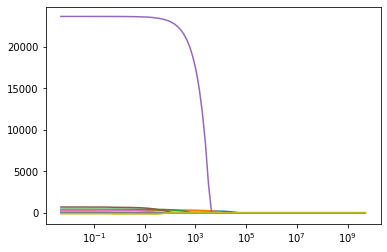

In [ ]:
ax = plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

lasso_cv_model = LassoCV(alphas = alphas, cv = 10, max_iter = 100000).fit(X_train, y_train) #aranacak alphaları verdik. np.sqrt düştü.

In [ ]:
lasso_tuned = Lasso(alpha = lasso_cv_model.alpha_).fit(X_train, y_train)

In [ ]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred)) #final modelimizin test hatası

5826.6954819780285

In [ ]:
lasso_tuned.score(X_test,y_test)

0.7813162148670942

## 5.5 ElasticNET

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV

In [ ]:
enet_model = ElasticNet().fit(X_train, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, enet_model.predict(X_test))) #Test hatamızı hesapladık. ilkel test hatamız.

9498.299545820737

In [ ]:
enet_model.score(X_test,y_test) #Performans çok kötü. Tune etmeye bile gerek yok.

0.41888288944300334